# Food Delivery Time Data Analysis and Prediction

Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler  # Add this import


from sklearn.metrics import accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [152]:
data = pd.read_csv("C:/Users/abu_s/Desktop/Data/Json/Food Delivery Times/Food_Delivery_Times.csv")

In [153]:
data.head(3)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [155]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.732000,22.070915,8.00,41.000,55.50,71.0000,153.00


In [156]:
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [157]:
null_value_columns = data.columns[data.isnull().any()].to_list()
null_value_columns

# Handling null values

# Filling null values in the categorical columns with mode value
for col in null_value_columns:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

data.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [158]:
data.duplicated().sum()
# Number of unique values in each columns
data.nunique()

Order_ID                  1000
Distance_km                785
Weather                      5
Traffic_Level                3
Time_of_Day                  4
Vehicle_Type                 3
Preparation_Time_min        25
Courier_Experience_yrs      10
Delivery_Time_min          108
dtype: int64

In [159]:
# Unique values in categorical columns
categorical_columns = data.select_dtypes(['object']).columns

for col in data[categorical_columns]:
    unique_values = data[col].unique()
    print(f"Unique Values in {col} column :\n{unique_values}\n\n")

Unique Values in Weather column :
['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy']


Unique Values in Traffic_Level column :
['Low' 'Medium' 'High']


Unique Values in Time_of_Day column :
['Afternoon' 'Evening' 'Night' 'Morning']


Unique Values in Vehicle_Type column :
['Scooter' 'Bike' 'Car']




## Exploratory Analysis And Visualization

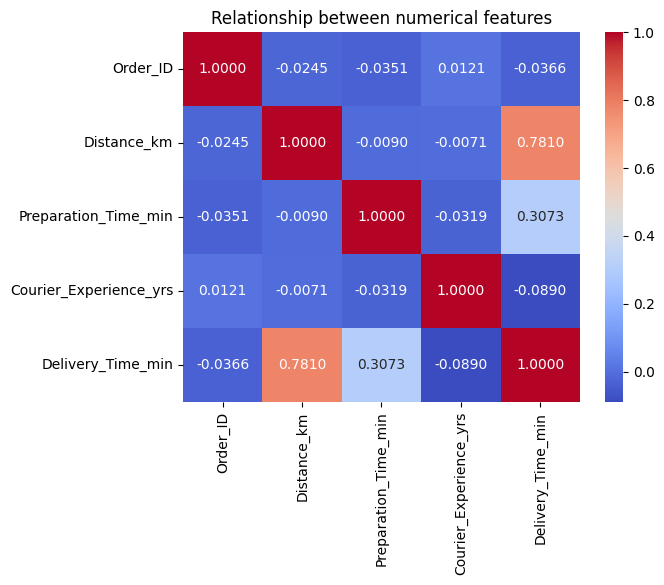

In [161]:
# Heatmap correlation

numerical_columns = data.select_dtypes(['int64', 'float64']).columns

sns.heatmap(data = data[numerical_columns].corr(),
           annot = True,
           fmt = '.4f',
           cmap = 'coolwarm')
plt.title('Relationship between numerical features')
plt.show()

#### Delivery Time

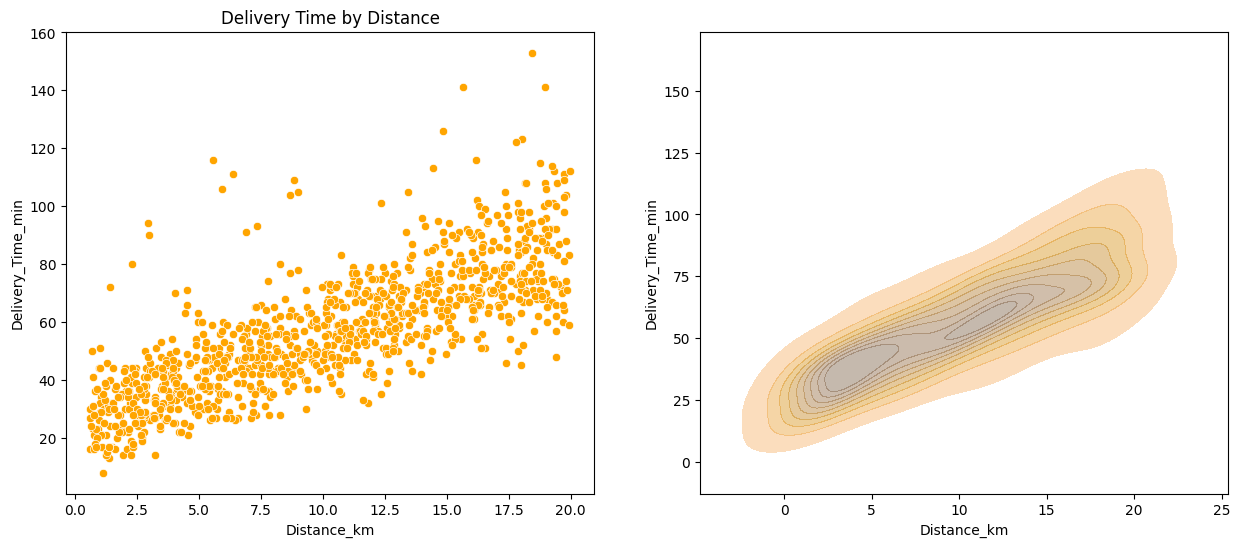

In [163]:
# Delivery time by distance

figure, axes = plt.subplots(1, 2, figsize = (15,6))

sns.scatterplot(data = data,
               x = 'Distance_km',
               y = 'Delivery_Time_min',
               color = 'orange',
               ax = axes[0])

sns.kdeplot(data = data,
           x = 'Distance_km',
           y = 'Delivery_Time_min',
           fill = True,
           alpha = 0.4,
           color = 'orange',
           ax = axes[1])

axes[0].set_title('Delivery Time by Distance')
plt.show()

#### Preparation Time

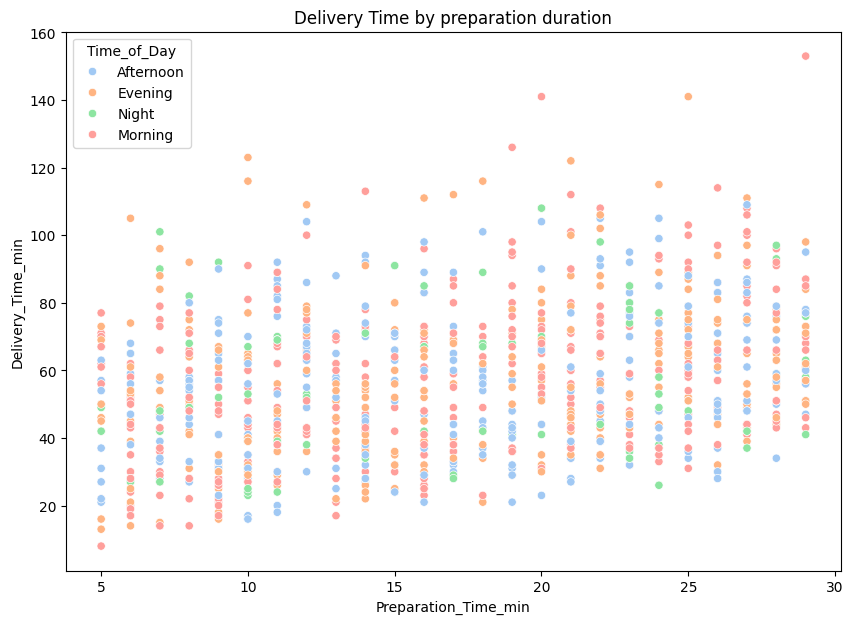

In [165]:
# Preparation time
plt.figure(figsize = (10, 7))
sns.scatterplot(data = data,
               x = 'Preparation_Time_min',
               y = 'Delivery_Time_min',
               hue = 'Time_of_Day',
               palette = 'pastel')
plt.title('Delivery Time by preparation duration')
plt.show()

#### Courier Experience Years

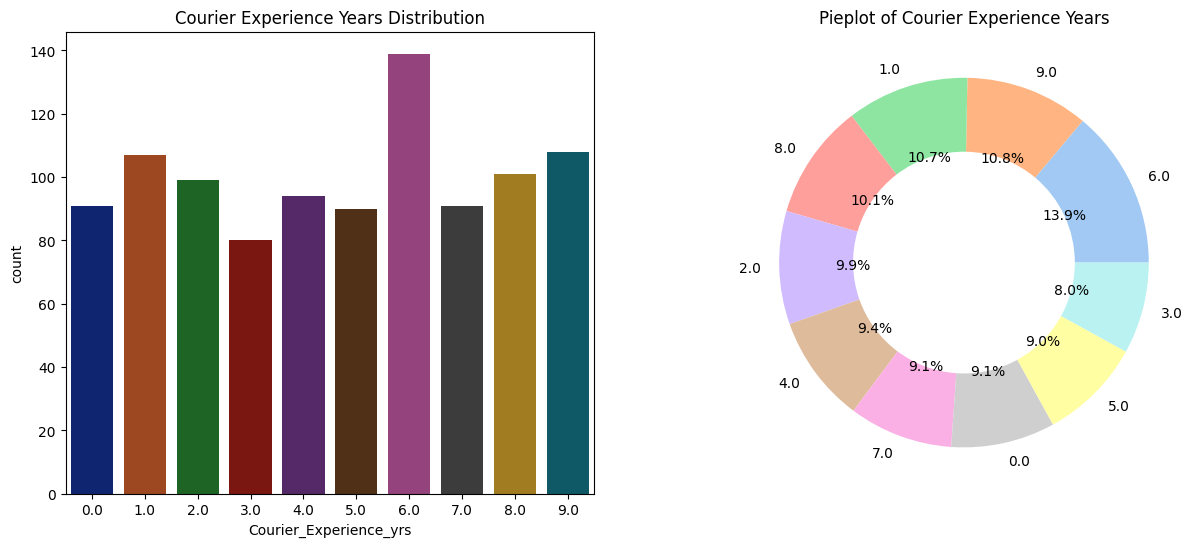

In [167]:
# Courier Experience Years Distribution

fig, axes = plt.subplots(1, 2, figsize =(15, 6))

sns.countplot(data = data,
             x = 'Courier_Experience_yrs',
             palette = 'dark',
             ax = axes[0])
axes[0].set_title('Courier Experience Years Distribution')

count_courier_exp_years = data['Courier_Experience_yrs'].value_counts()

axes[1].pie(count_courier_exp_years,
           labels = count_courier_exp_years.index,
           autopct = '%1.1f%%',
           colors = sns.color_palette('pastel'),
           wedgeprops = dict(width = 0.4))
axes[1].set_title('Pieplot of Courier Experience Years')

plt.show()

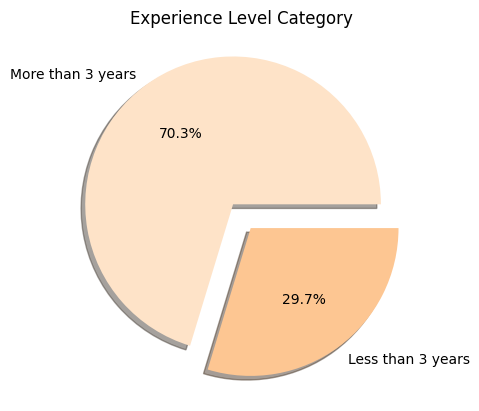

In [168]:
count_cat_exp = (data['Courier_Experience_yrs'] < 3).value_counts()

plt.pie(count_cat_exp,
       labels = ['More than 3 years', 'Less than 3 years'],
       autopct = '%1.1f%%',
       explode = [0.1, 0.1],
       shadow = True,
       colors = sns.color_palette('Oranges'))
plt.title('Experience Level Category')
plt.show()

#### Weather

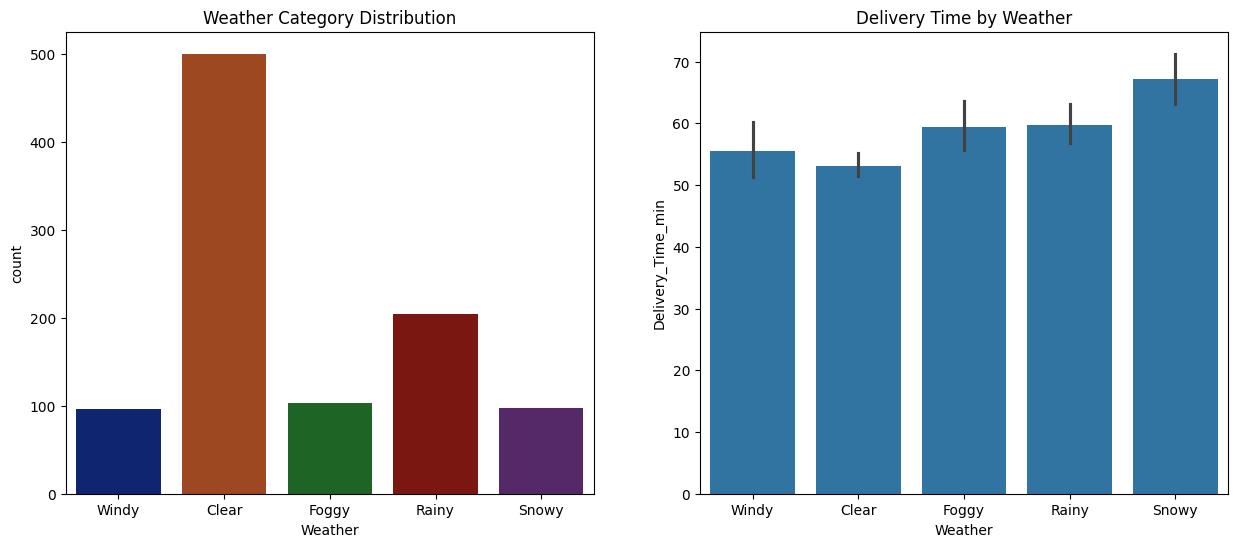

In [170]:
# Weather Distribution

fig, axes = plt.subplots(1, 2, figsize =(15, 6))

sns.countplot(data = data,
             x = 'Weather',
             palette = 'dark',
             ax = axes[0])
axes[0].set_title('Weather Category Distribution')

count_courier_exp_years = data['Courier_Experience_yrs'].value_counts()

sns.barplot(data = data,
               x = 'Weather',
               y = 'Delivery_Time_min',
               ax = axes[1])
axes[1].set_title('Delivery Time by Weather')
plt.show()

#### Traffic Levels

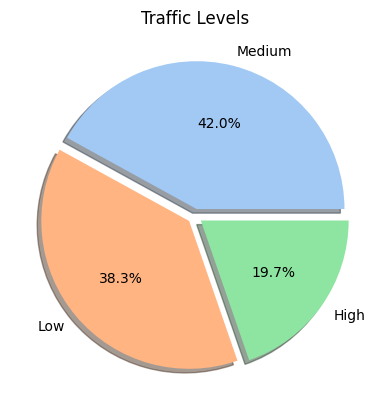

In [172]:
# Traffic Level
count_traffic_level = data['Traffic_Level'].value_counts()

plt.pie(count_traffic_level,
       labels = count_traffic_level.index,
       autopct = '%1.1f%%',
       colors = sns.color_palette('pastel'),
       explode = [0.05, 0.05, 0.05],
       shadow = True)
plt.title('Traffic Levels')
plt.show()


In [173]:
data['High_Exp_Level'] = data['Courier_Experience_yrs'] > 3
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,High_Exp_Level
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,False
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,False
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,False
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,False
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,True


In [174]:
# One-hot encode categorical columns that have nordinal values
data = pd.get_dummies(data = data, columns = ['Weather', 'Time_of_Day', 'Vehicle_Type'])
data.head()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,High_Exp_Level,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,Low,12,1.0,43,False,False,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,Medium,20,2.0,84,False,True,False,False,False,False,False,True,False,False,True,False,False
2,741,9.52,Low,28,1.0,59,False,False,True,False,False,False,False,False,False,True,False,False,True
3,661,7.44,Medium,5,1.0,37,False,False,False,True,False,False,True,False,False,False,False,False,True
4,412,19.03,Low,16,5.0,68,True,True,False,False,False,False,False,False,True,False,True,False,False


In [175]:
# Label Encoding categorical columns with ordinal values

label_encoder = LabelEncoder()

data['Traffic_Level'] = label_encoder.fit_transform(data['Traffic_Level'])


In [176]:
data.head(3)

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,High_Exp_Level,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,1,12,1.0,43,False,False,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,2,20,2.0,84,False,True,False,False,False,False,False,True,False,False,True,False,False
2,741,9.52,1,28,1.0,59,False,False,True,False,False,False,False,False,False,True,False,False,True


In [177]:
df_encoded = data

In [216]:
selected_features = ['Distance_km', 'Preparation_Time_min']

X = df_encoded[selected_features]
y = df_encoded['Delivery_Time_min']

# Training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

## Model Selection

In [219]:
# Model Prediction

lr = LinearRegression()
standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [224]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f"R-squared : {r2:.4f}")
print(f"Mean Absolute Error (MAE) : {mae:.4f}")
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.4f}")

# Model Coeficients

print(f"Coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

R-squared : 0.7454
Mean Absolute Error (MAE) : 8.0661
Mean Squared Error (MSE) : 125.7540
Root Mean Squared Error (RMSE) : 11.2140
Coefficients : [16.92241604  7.20150499]
Intercept : 57.193333333333335


### Actual vs Predicted

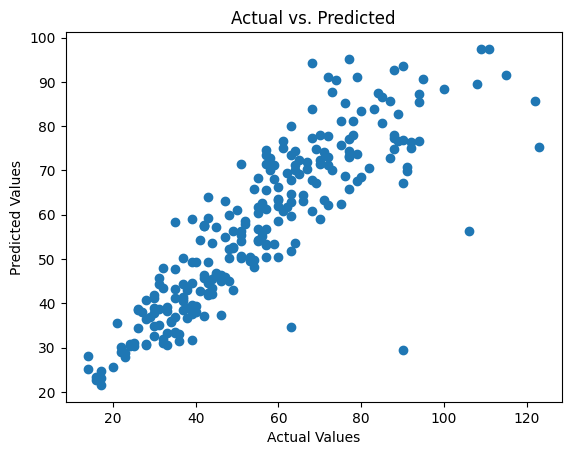

In [227]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

In [229]:
# Assume a data with distance of 30km and 30mins of preparation time
new_data = [[30, 30]]
scaled_new_data = standard_scaler.fit_transform(new_data)

prediction = lr.predict(scaled_new_data)
print("Predicted delivery time value : ", prediction)

Predicted delivery time value :  [57.19333333]
